In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [119]:
df = pd.read_csv('fraude_detection.csv', parse_dates=['creationdate'])
df.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51,20000.0,22250.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35,10000.0,11500.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39,40000.0,44000.0,30,NaN,Good


In [120]:
#removing these columns coz they are not ideally dependable features for making the predictions as seen in the 
#above dataframe
df1 = df.drop(['customerid','referredby','approveddate'], axis='columns')


In [121]:
df1.head()

,systemloanid,loannumber,creationdate,loanamount,totaldue,termdays,good_bad_flag
0,301994762,12,2017-07-25 07:22:47,30000.0,34500.0,30,Good
1,301965204,2,2017-07-05 16:04:18,15000.0,17250.0,30,Good
2,301966580,7,2017-07-06 13:52:51,20000.0,22250.0,15,Good
3,301999343,3,2017-07-27 18:00:35,10000.0,11500.0,15,Good
4,301962360,9,2017-07-03 22:42:39,40000.0,44000.0,30,Good


In [122]:
#converting creationdate into independent columns for days month date year.
#:) might be helpfull to id periods when some fraudulent loans are taken out.
df1['year'] = df1['creationdate'].dt.year
df1['month'] = df1['creationdate'].dt.month
df1['day'] = df1['creationdate'].dt.day
df1['day_of_week'] = df1['creationdate'].dt.dayofweek
df1['hour'] = df1['creationdate'].dt.hour
#print(df.loc[:6,['year','month','day','day_of_week','hour']])
df1.head()

,systemloanid,loannumber,creationdate,loanamount,totaldue,termdays,good_bad_flag,year,month,day,day_of_week,hour
0,301994762,12,2017-07-25 07:22:47,30000.0,34500.0,30,Good,2017,7,25,1,7
1,301965204,2,2017-07-05 16:04:18,15000.0,17250.0,30,Good,2017,7,5,2,16
2,301966580,7,2017-07-06 13:52:51,20000.0,22250.0,15,Good,2017,7,6,3,13
3,301999343,3,2017-07-27 18:00:35,10000.0,11500.0,15,Good,2017,7,27,3,18
4,301962360,9,2017-07-03 22:42:39,40000.0,44000.0,30,Good,2017,7,3,0,22


In [123]:
df2 = df1.drop(['creationdate'], axis='columns')
df2.head()

,systemloanid,loannumber,loanamount,totaldue,termdays,good_bad_flag,year,month,day,day_of_week,hour
0,301994762,12,30000.0,34500.0,30,Good,2017,7,25,1,7
1,301965204,2,15000.0,17250.0,30,Good,2017,7,5,2,16
2,301966580,7,20000.0,22250.0,15,Good,2017,7,6,3,13
3,301999343,3,10000.0,11500.0,15,Good,2017,7,27,3,18
4,301962360,9,40000.0,44000.0,30,Good,2017,7,3,0,22


In [124]:
from sklearn.preprocessing import LabelEncoder

In [125]:
#converting good_bad_flag('fraud indicator') into numerical format suitable for our model
le = LabelEncoder()
gbf = le.fit_transform(df2['good_bad_flag'])
df3 = pd.DataFrame(gbf, columns=['Fraud = 0, no Fraud = 1'])
df3.head()

,"Fraud = 0, no Fraud = 1"
0,1
1,1
2,1
3,1
4,1


In [126]:
df4 = pd.concat([df2,df3], axis='columns')
df4.head()

,systemloanid,loannumber,loanamount,totaldue,termdays,good_bad_flag,year,month,day,day_of_week,hour,"Fraud = 0, no Fraud = 1"
0,301994762,12,30000.0,34500.0,30,Good,2017,7,25,1,7,1
1,301965204,2,15000.0,17250.0,30,Good,2017,7,5,2,16,1
2,301966580,7,20000.0,22250.0,15,Good,2017,7,6,3,13,1
3,301999343,3,10000.0,11500.0,15,Good,2017,7,27,3,18,1
4,301962360,9,40000.0,44000.0,30,Good,2017,7,3,0,22,1


In [127]:
df5 = df4.drop(['good_bad_flag'], axis = 'columns')

In [128]:
#final dataframe to be used.
finaldf = df5
finaldf.head()

,systemloanid,loannumber,loanamount,totaldue,termdays,year,month,day,day_of_week,hour,"Fraud = 0, no Fraud = 1"
0,301994762,12,30000.0,34500.0,30,2017,7,25,1,7,1
1,301965204,2,15000.0,17250.0,30,2017,7,5,2,16,1
2,301966580,7,20000.0,22250.0,15,2017,7,6,3,13,1
3,301999343,3,10000.0,11500.0,15,2017,7,27,3,18,1
4,301962360,9,40000.0,44000.0,30,2017,7,3,0,22,1


In [129]:
#visualizations time:)
finaldf.describe()


,systemloanid,loannumber,loanamount,totaldue,termdays,year,month,day,day_of_week,hour,"Fraud = 0, no Fraud = 1"
count,4.368000e+03,4368.000000,4368.000000,4368.000000,4368.000000,4368.0,4368.0,4368.000000,4368.000000,4368.000000,4368.000000
mean,3.019810e+08,5.172390,17809.065934,21257.377679,29.261676,2017.0,7.0,15.743819,2.710165,12.350962,0.782051
std,1.343115e+04,3.653569,10749.694571,11943.510416,11.512519,0.0,0.0,8.653870,1.891799,5.033321,0.412900
min,3.019585e+08,2.000000,10000.000000,10000.000000,15.000000,2017.0,7.0,1.000000,0.000000,0.000000,0.000000
25%,3.019691e+08,2.000000,10000.000000,13000.000000,30.000000,2017.0,7.0,8.000000,1.000000,8.000000,1.000000
50%,3.019801e+08,4.000000,10000.000000,13000.000000,30.000000,2017.0,7.0,16.000000,3.000000,12.000000,1.000000
75%,3.019935e+08,7.000000,20000.000000,24500.000000,30.000000,2017.0,7.0,24.000000,4.000000,16.000000,1.000000
max,3.020040e+08,27.000000,60000.000000,68100.000000,90.000000,2017.0,7.0,30.000000,6.000000,23.000000,1.000000


Text(0.5, 1.0, 'FraudResult Distributions within the dataset\n (0: Fraud || 1: No Fraud)')

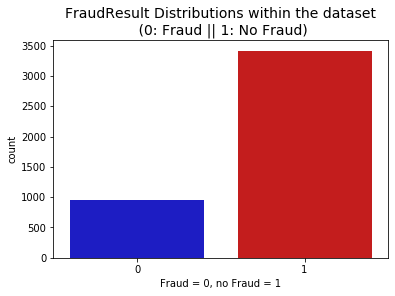

In [130]:
import seaborn as sns
colors = ["#0101DF", "#DF0101"]

sns.countplot('Fraud = 0, no Fraud = 1', data = finaldf, palette = colors)

plt.title('FraudResult Distributions within the dataset\n (0: Fraud || 1: No Fraud)', fontsize=14)

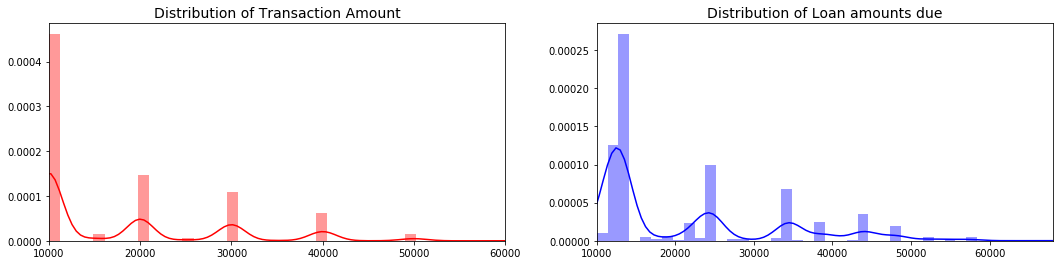

In [131]:
#a little visualiztion.
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = finaldf['loanamount'].values
totaldue_val = finaldf['totaldue'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(totaldue_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Loan amounts due', fontsize=14)
ax[1].set_xlim([min(totaldue_val), max(totaldue_val)])




plt.show()

In [132]:
# Classifier Libraries
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

finaldf['loanamount'] = rob_scaler.fit_transform(finaldf['loanamount'].values.reshape(-1,1))
finaldf['loannumber'] = rob_scaler.fit_transform(finaldf['loannumber'].values.reshape(-1,1))

#finaldf.drop(['loannumber','loanamount'], axis=1, inplace=True)

In [133]:
from sklearn.model_selection import train_test_split

X = finaldf.loc[:, finaldf.columns != 'Fraud = 0, no Fraud = 1']
y = finaldf.loc[:,'Fraud = 0, no Fraud = 1']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#implementing models as classifiers.
Classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "LinearRegression": LinearRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}




In [134]:
from sklearn.model_selection import cross_val_score

for key, Classifier in Classifiers.items():
    Classifier.fit(X_train, y_train)
    training_score = cross_val_score(Classifier, X_train, y_train, cv=5)
    print("Classifiers: ", Classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")    

Classifiers:  LogisticRegression Has a training score of 78.0 % accuracy score
Classifiers:  LinearRegression Has a training score of 2.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 74.0 % accuracy score
Classifiers:  SVC Has a training score of 78.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 66.0 % accuracy score


In [135]:
#THE MODELS HAVE POOR PERFORMANCE SO I NOW HAVE TO DO SOME FEATURE SCALING.
#LETS SEE HOW IT PLAYS OUT.

In [136]:
# ----->  Removing Outliers in our data (Highest Negative Correlated with Labels)

import numpy as np
v14_fraud = finaldf['loanamount'].loc[finaldf['Fraud = 0, no Fraud = 1'] == 0].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('loanamount Lower: {}'.format(v14_lower))
print('loanamount Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature loanamount Outliers for Fraud Cases: {}'.format(len(outliers)))
print('loanamount outliers:{}'.format(outliers))

new_df = finaldf.drop(finaldf[(finaldf['loanamount'] > v14_upper) | (finaldf['loanamount'] < v14_lower)].index)
print('----' * 44)



Quartile 25: 0.0 | Quartile 75: 1.0
iqr: 1.0
Cut Off: 1.5
loanamount Lower: -1.5
loanamount Upper: 2.5
Feature loanamount Outliers for Fraud Cases: 58
loanamount outliers:[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 5.0, 3.0, 3.0, 3.0, 4.0, 3.0, 4.0, 4.0, 4.0, 3.0]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [137]:
# -----> V12 removing outliers from fraud transactions
v12_fraud = finaldf['loannumber'].loc[finaldf['Fraud = 0, no Fraud = 1'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('loan number Lower: {}'.format(v12_lower))
print('loan number Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('loan number outliers: {}'.format(outliers))
print('Feature loan number Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['loannumber'] > v12_upper) | (new_df['loannumber'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)

loan number Lower: -2.2
loan number Upper: 2.6000000000000005
loan number outliers: [2.8, 3.6, 3.6, 3.0, 4.6, 3.2, 3.4, 3.0, 3.0, 3.6, 3.0, 3.6, 3.8, 2.8, 3.0, 3.2, 3.0]
Feature loan number Outliers for Fraud Cases: 17
Number of Instances after outliers removal: 3948
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [138]:
#splitting train and test data using new scaled data with no outliers
#:) expect better results
a = new_df.loc[:, new_df.columns != 'Fraud = 0, no Fraud = 1']
b = new_df.loc[:,'Fraud = 0, no Fraud = 1']
a_train, a_test, b_train, b_test = train_test_split(a,b, test_size=0.2)
# Turn the values into an array for feeding the classification algorithms.
a_train = a_train.values
a_test = a_test.values
b_train = b_train.values
b_test = b_test.values

In [139]:

for key, Classifier in Classifiers.items():
    Classifier.fit(a_train, b_train)
    training_score = cross_val_score(Classifier, X_train, y_train, cv=5)
    print("Classifiers: ", Classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score") 

Classifiers:  LogisticRegression Has a training score of 78.0 % accuracy score
Classifiers:  LinearRegression Has a training score of 2.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 74.0 % accuracy score
Classifiers:  SVC Has a training score of 78.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 66.0 % accuracy score
